In [1]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file

In [2]:
src_dir = "/Users/lelisra/Documents/vf/projects/data/Sales_Data"
files = [f for f in os.listdir(src_dir)]
all_months_data = pd.DataFrame()

for f in files:
    df = pd.read_csv(f"{src_dir}/{f}")
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv(f"{src_dir}/all_data.csv", index=False)
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Read updated dataframe

In [3]:
all_data = pd.read_csv(f"{src_dir}/all_data.csv", parse_dates=["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:

#all_data.groupby(pd.Grouper(freq='M'))
#all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

### Clean up the data

#### Drop NaN rows

In [5]:
nan_df = all_data[all_data.isnull()]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
560545,NaN,NaN,NaN,NaN,NaN,NaN
560546,NaN,NaN,NaN,NaN,NaN,NaN
560547,NaN,NaN,NaN,NaN,NaN,NaN
560548,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
560545,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
560546,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
560547,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
560548,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [7]:
all_data = all_data[all_data["Order Date"].str[:2] != "Or"]

### Augment the data with additional columns

#### Task 2: Add Month column

In [8]:
all_data["Month"] = all_data["Order Date"].str[:2]
all_data["Month"] = all_data["Month"].astype('int32')
all_data.head()

/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1405102964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Order Date"].str[:2]
/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1405102964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Month"].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Convert columns to the correct type

In [9]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1306031663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1306031663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])


### Task 3: Add a sales column

In [10]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/284501744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Task 4: Add a city column

In [11]:
# let's use the .apply()

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")



all_data.head()


/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1691819514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [12]:
results = all_data.groupby(["Month"]).sum()

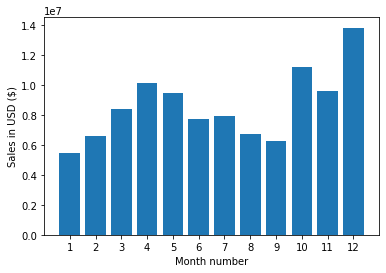

In [13]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

## Analysis/Awnsers:

- Look for correlations!
- Why december has the most sales? It's because is christmas or we did have better Ads campains?
- January shows the lower sales. what can be done to improve it?

#### Question 2: What city had the highest number of sales

In [14]:
results = all_data.groupby(["City"]).sum()
results.head(10)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),49806,8339724.60,314382,8386495.74
Austin (TX),33459,5429620.83,209487,5458745.25
Boston (MA),67584,10912229.31,423336,10984926.03
Dallas (TX),50190,8257883.46,313860,8303926.20
Los Angeles (CA),99867,16264305.69,624975,16357712.40
New York City (NY),83796,13906112.49,527223,13992952.29
Portland (ME),8250,1341567.75,51432,1349274.81
Portland (OR),33909,5581674.66,211863,5612197.02
San Francisco (CA),150717,24634385.22,946560,24786611.73


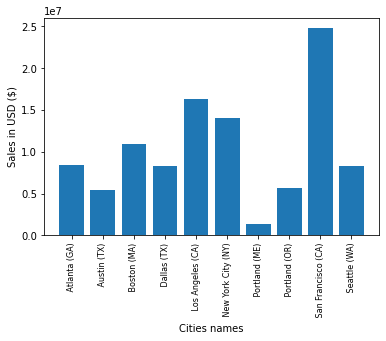

In [15]:
months = range(1, 13)

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Cities names")
plt.show()

## Analysis/Awnsers:

- Look for correlations!
- Why is San Francisco in front of all other Cities? Is because sylicon valey needs more electronics?
- People have more money in San Francisco
- Tech to advertisement is higher there?
- Why Portland has the worst results? Is because it's a smaller city?


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [16]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/2617628323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


In [17]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1270050520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data["Order Date"].dt.hour
/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/1270050520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data["Order Date"].dt.minute


In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [19]:
all_data.groupby("Hour").count().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,11730,11730,11730,11730,11730,11730,11730,11730,11730,11730
1,7050,7050,7050,7050,7050,7050,7050,7050,7050,7050
2,3729,3729,3729,3729,3729,3729,3729,3729,3729,3729
3,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493
4,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562


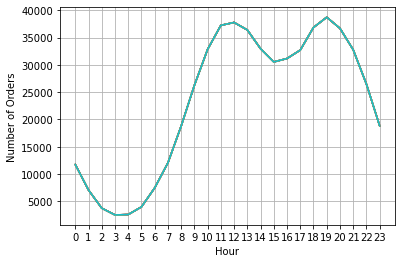

In [20]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

## Analysis/Awnsers:
- Recommended hours to place Ads is around 11am or 7pm
- People make orders before and after job or in job breaks

#### Question 4: What products are most often sold together?

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [22]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,"LG Washing Machine,LG Washing Machine,LG Washi..."
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [23]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
0,295665,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
1,295666,"LG Washing Machine,LG Washing Machine,LG Washi..."
2,295667,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,295668,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,295669,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


In [24]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)
for key, value in count.most_common(10):
    print(key, value)


#print(count)

('USB-C Charging Cable', 'USB-C Charging Cable') 66141
('Lightning Charging Cable', 'Lightning Charging Cable') 65460
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 62355
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 62046
('Wired Headphones', 'Wired Headphones') 56961
('Apple Airpods Headphones', 'Apple Airpods Headphones') 46863
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 40218
('27in FHD Monitor', '27in FHD Monitor') 22602
('iPhone', 'iPhone') 20544
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 18735


## Analysis/Awnsers:
- People already want to buy an extra lightning cable, but you can tweek your Ads campain to have even more people to buy the combined items
- Use this data to improve the sales of the less common items bougth together

#### Question 5: What product sold the most? Why do you think it sold the most?

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [26]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()["Quantity Ordered"]

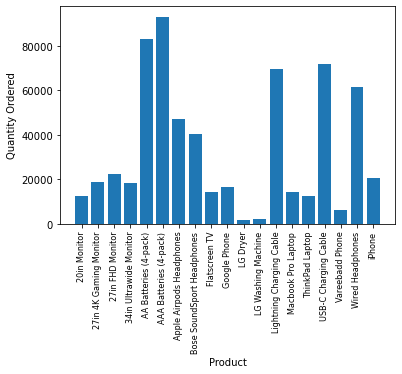

In [27]:
months = range(1, 13)

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.show()

## Analysis/Awnsers:
- Items most solds like Triple A batteries may be due to their cheaper price
- As DS we need to prove our hipotesys. (Check for correlations below)

In [28]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/gr/w98n2th52lb14mflb3qpm_2sz3j52m/T/ipykernel_35441/2399266237.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


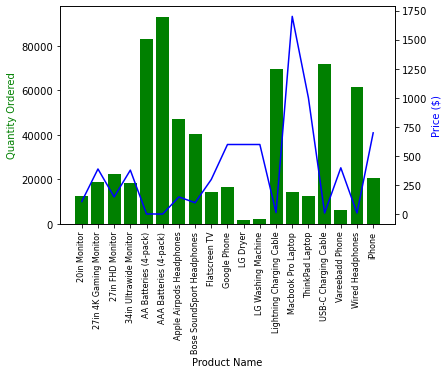

In [29]:
# Add a second y-axis to our Quantity ordered above and observe if there's any correlation

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

## Analysis/Awnsers:
- The price and the quantity ordered do correlates, i.e. whenever the quantity ordered is high the price is low
- There's also some inconsistencies such as for the case of the Macbook sales compared to LG dryer. For this particular case we can assume that due to the population of students and professionals being greather than the population needing Dryers, the "inconsistency" can be justified this way

## Tutorial Link

- https://youtu.be/eMOA1pPVUc4